## Problem2

We have a dataset about 517 fires from the Montesano natural park in Portugal. For each incident, weekday, month, coordinates, and the burnt area are recorded, as well as several meteorological data such as rain, temperature, humidity, and wind. Predict the burnt area of forest fires with the help of an Artificial Neural Network model

In [45]:
# Import necessary libraries for MLP and reshaping the data structres
import numpy as np
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
# from keras.layers import Dropout,Flatten
from keras.utils import np_utils

np.random.seed(10)


In [46]:
import pandas as pd
data = pd.read_csv("fireforests.csv")

In [47]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],
      dtype='object')

In [49]:
data.drop(columns=['month','day'],inplace=True)

In [50]:
data['area1']= data['area']
data.drop(columns=['area'],inplace=True)

In [51]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,area1
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,1,0,0,0,0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,1,0,0,0,0,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0.0


In [52]:
data[data.duplicated()]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,area1
53,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0.00
100,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0.00
215,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,0,0,...,0,0,0,0,1,0,0,0,0,28.66
303,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,1,0,...,0,0,0,1,0,0,0,0,0,0.00
426,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0.00
461,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0.00
501,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0,0,...,0,0,0,0,0,0,0,0,0,0.00
508,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0.00


In [53]:
data.drop_duplicates(inplace = True,keep='first')

In [54]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,area1
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.020889,-0.057581,...,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,-0.011152,-0.105205,...,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,-0.001642,-0.053198,...,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.051599,-0.159333,...,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,-0.077766,-0.135289,...,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,0.069599,0.010311,...,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.121056,-0.062712,...,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.001723,-0.028473,...,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319,-0.006511
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,1.000000,-0.182056,...,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903,-0.052390
daymon,-0.057581,-0.105205,-0.053198,-0.159333,-0.135289,0.010311,-0.062712,-0.028473,-0.182056,1.000000,...,0.002649,-0.025905,-0.014978,0.021525,0.078374,-0.025905,-0.018300,0.059957,0.035281,-0.022178


In [55]:
data.iloc[:,:-1]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data.iloc[:,-1]

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area1, Length: 509, dtype: float64

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(data.iloc[:,:-1])

In [58]:
print(X[:5, :])

[[0.87096774 0.08649207 0.1013252  0.09090909 0.19292605 0.42352941
  0.7        0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.        ]
 [0.92774194 0.11819435 0.77541926 0.11942959 0.50803859 0.21176471
  0.05555556 0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.        ]
 [0.92774194 0.14679531 0.79629412 0.11942959 0.39871383 0.21176471
  0.1        0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.        ]
 [0.94193548 0.11095796 0.08162308 0.16042781 0.19614148 0.96470588
  0.4        0.03125    1.         0.         0.         0.
  0.         0.     

In [59]:
y=data.iloc[:,-1]

In [60]:
# Separating the data set into 2 parts - all the inputs and label columns
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# summarize first 5 rows
print(X_train[:5, :])

[[0.98193548 0.36940041 0.74961886 0.3030303  0.46302251 0.45882353
  0.55555556 0.         0.         0.         0.         0.
  0.         1.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.87612903 0.04169538 0.04116336 0.09447415 0.32475884 0.42352941
  0.05555556 0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.8516129  0.02894555 0.05910637 0.07308378 0.17041801 0.65882353
  0.65555556 0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.93290323 0.41385252 0.64934913 0.12477718 0.62379421 0.04705882
  0.7        0.         0.         0.         0.         0.
  0.         1.     

In [61]:
y_train.shape


(407,)

In [62]:
X_test.shape


(102, 27)

In [63]:
y_test.shape

(102,)

In [64]:
hidden_units1 = 500
hidden_units2 = 380
hidden_units3 = 156
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def design_mlp():
    model = Sequential([
    Dense(hidden_units1, kernel_initializer='uniform', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='uniform', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='uniform', activation='relu'),
    Dropout(0.2),
    Dense(1, kernel_initializer='uniform', activation='linear')
    ])
    return model

In [65]:
# building a cnn model using train data set and validating on test data set
model = design_mlp()

# fitting model on train data
#model.fit(x=X_train,y=y_train,batch_size=5,epochs=500,verbose = 1)


In [66]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import adam_v2
#from keras.optimizers import adam
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=adam_v2.Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

In [67]:
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=60
)

Epoch 1/100
7/7 [==============================] - 2s 5ms/step - loss: 2.6545 - mean_squared_logarithmic_error: 2.6472
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 1.9406 - mean_squared_logarithmic_error: 1.9398
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 1.9770 - mean_squared_logarithmic_error: 1.9755
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 1.8312 - mean_squared_logarithmic_error: 1.8301
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 1.8782 - mean_squared_logarithmic_error: 1.8748
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 1.9898 - mean_squared_logarithmic_error: 1.9835
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 1.8079 - mean_squared_logarithmic_error: 1.8050
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 1.8585 - mean_squared_logarithmic_error: 1.8591
Epoch 9/100
7/7 [==============================]

7/7 [==============================] - 0s 6ms/step - loss: 1.5585 - mean_squared_logarithmic_error: 1.5591
Epoch 70/100
7/7 [==============================] - 0s 6ms/step - loss: 1.4270 - mean_squared_logarithmic_error: 1.4256
Epoch 71/100
7/7 [==============================] - 0s 5ms/step - loss: 1.3987 - mean_squared_logarithmic_error: 1.3982
Epoch 72/100
7/7 [==============================] - 0s 6ms/step - loss: 1.3874 - mean_squared_logarithmic_error: 1.3828
Epoch 73/100
7/7 [==============================] - 0s 5ms/step - loss: 1.1767 - mean_squared_logarithmic_error: 1.1784
Epoch 74/100
7/7 [==============================] - 0s 5ms/step - loss: 1.2703 - mean_squared_logarithmic_error: 1.2709
Epoch 75/100
7/7 [==============================] - 0s 5ms/step - loss: 1.3610 - mean_squared_logarithmic_error: 1.3597
Epoch 76/100
7/7 [==============================] - 0s 6ms/step - loss: 1.3308 - mean_squared_logarithmic_error: 1.3325
Epoch 77/100
7/7 [==============================] - 0

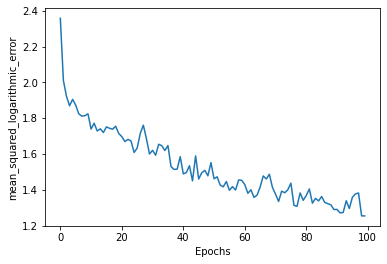

In [68]:
import matplotlib.pyplot as plt
def plot_history(history, key):
    plt.plot(history.history[key])
    #plt.plot(history.history['val_'+key])
    plt.xlabel("Epochs")
    plt.ylabel(key)
    #plt.legend([key, 'val_'+key])
    plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [69]:
y_pred = model.predict(X_test)

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.12337963339598623